In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats

import os, sys

project_root = '/user_data/mmhender/featsynth/'
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils

import get_gram_matrix_discrim


In [2]:
# load image info
image_set_name = 'images_ecoset64'
image_list_filename = os.path.join(project_root, 'features','raw', '%s_list.csv'%(image_set_name))
labels = pd.read_csv(image_list_filename)

# figure out some image/category properties here
n_ims_each = np.sum(np.array(labels['basic_name'])==np.array(labels['basic_name'])[0])
basic_names = np.array(labels['basic_name'][0::n_ims_each])
super_names_long = np.array(labels['super_name'][0::n_ims_each])

n_basic = len(basic_names)
n_super = len(np.unique(super_names_long))
n_basic_each_super  = int(n_basic/n_super)
super_names = super_names_long[0::n_basic_each_super]
super_inds_long = np.repeat(np.arange(n_super), n_basic_each_super)

# more image properties to organize images
image_type_names = ['orig']
n_image_types = len(image_type_names)
cue_level_names = ['basic','super']

In [3]:
layer_names = ['pool1','pool2','pool3', 'pool4']
n_layers = len(layer_names)

d_all = dict()

n_ims_vals = [128, 256, 496]
# n_ims_vals = [128, 256]

n_v = len(n_ims_vals)

basic_acc = np.zeros((n_super, n_layers, n_v))
basic_dprime = np.zeros((n_super, n_layers, n_v))
super_acc = np.zeros((1, n_layers, n_v))
super_dprime = np.zeros((1, n_layers, n_v))
super_acc_each_supcat = np.zeros((n_super, n_layers, n_v))
super_dprime_each_supcat = np.zeros((n_super, n_layers, n_v))
basic_acc_each_bascat = np.zeros((n_basic, n_layers, n_v))
basic_dprime_each_bascat = np.zeros((n_basic, n_layers, n_v))


for li, layer_name in enumerate(layer_names):
    
    for ni in range(n_v):

        save_dir = os.path.join(project_root, 'features', 'gram_matrices', 'categ_discrim')
        fn2load = os.path.join(save_dir, \
                               'categ_discrim_%s_%s_%dpercateg.npy'%\
                               (image_set_name, layer_name, n_ims_vals[ni]))
        print(fn2load)
        d = np.load(fn2load, allow_pickle=True).item()

        basic_acc[:,li,ni] = d['basic_acc']
        basic_dprime[:,li,ni] = d['basic_dprime']
        super_acc[:,li,ni] = d['super_acc']
        super_dprime[:,li,ni] = d['super_dprime']
    
        basic_acc_each_bascat[:,li,ni] = d['basic_acc_each_bascat']
        basic_dprime_each_bascat[:,li,ni] = d['basic_dprime_each_bascat']
        super_acc_each_supcat[:,li,ni] = d['super_acc_each_supcat']
        super_dprime_each_supcat[:,li,ni] = d['super_dprime_each_supcat']
    

/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_images_ecoset64_pool1_128percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_images_ecoset64_pool1_256percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_images_ecoset64_pool1_496percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_images_ecoset64_pool2_128percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_images_ecoset64_pool2_256percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_images_ecoset64_pool2_496percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_images_ecoset64_pool3_128percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_images_ecoset64_pool3_256percateg.npy
/user_data/mmhender/featsynth/features/gram_matr

In [5]:
# level_colors = np.array([[93,192,219], [44,92,168]])/255
# level_names = ['basic','super']
level_colors = np.array([[130, 181, 216], [44,92,168]])/255
level_names = ['Fine','Coarse']


In [6]:
np.mean(basic_acc[:,:,ni], axis=0, keepdims=True)

array([[0.53348664, 0.60521673, 0.69317036, 0.77438256]])

In [9]:
basic_acc.shape

(8, 4, 3)

In [7]:
super_acc[:,:,ni]

array([[0.53654234, 0.61113911, 0.68724798, 0.7671371 ]])

In [10]:
super_acc.shape

(1, 4, 3)

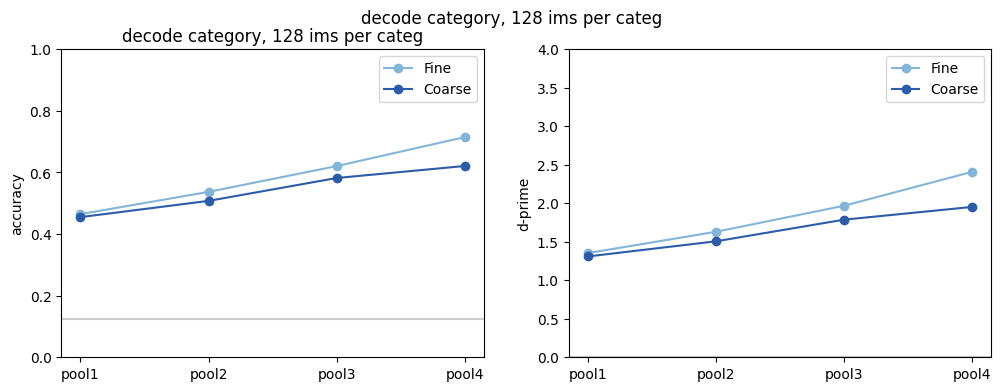

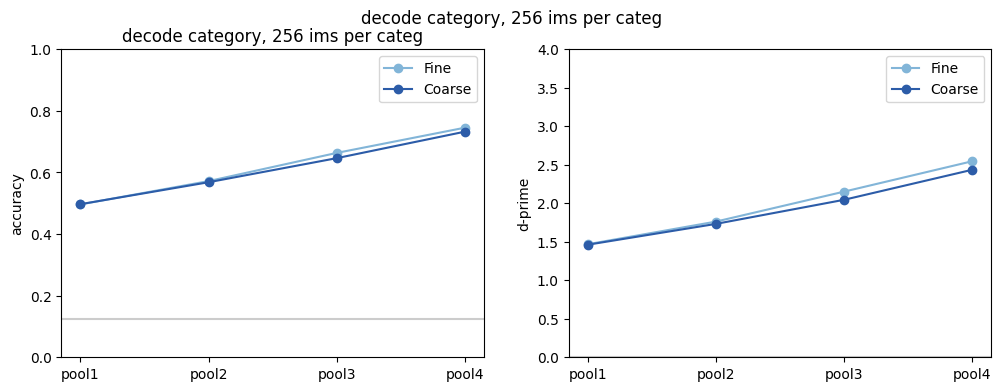

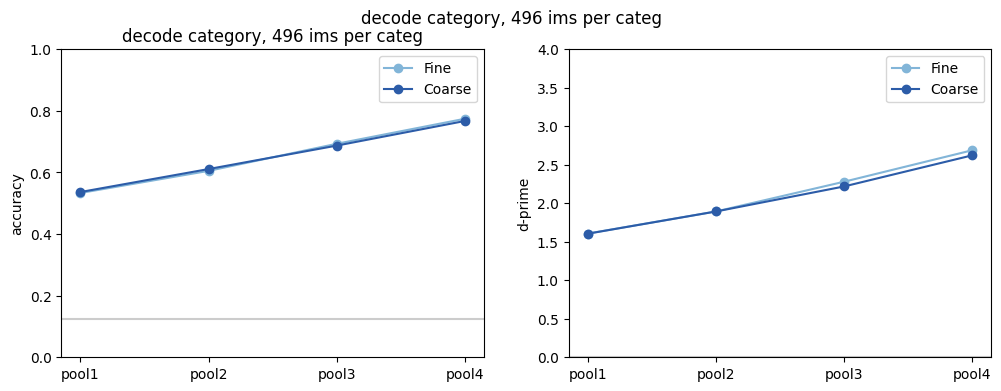

In [8]:
for ni in range(n_v):


    vals = np.array([np.mean(basic_acc[:,:,ni], axis=0, keepdims=True), \
                     super_acc[:,:,ni]])

    plt.figure(figsize=(12,4))
    ax = plt.subplot(1,2,1)
    lh = []
    for cc in range(2):

        h = plt.plot(vals[cc,0,:], 'o-', color=level_colors[cc,:])

        plt.xticks(np.arange(n_layers), layer_names)

        lh += [h[0]]

    plt.legend(lh, level_names)

    plt.axhline(1/8, color=[0.8, 0.8, 0.8])

    plt.ylabel('accuracy')

    
    plt.ylim([0, 1])
    plt.title('decode category, %d ims per categ'%n_ims_vals[ni])


    vals = np.array([np.mean(basic_dprime[:,:,ni], axis=0, keepdims=True), \
                     super_dprime[:,:,ni]])

    # plt.figure(figsize=(6,4))
    ax = plt.subplot(1,2,2)
    lh = []
    for cc in range(2):

        h = plt.plot(vals[cc,0,:], 'o-', color=level_colors[cc,:])

        plt.xticks(np.arange(n_layers), layer_names)

        lh += [h[0]]

    plt.legend(lh, level_names)

    plt.axhline(0, color=[0.8, 0.8, 0.8])
    plt.ylabel('d-prime')
    
    plt.ylim([0, 4])

    plt.suptitle('decode category, %d ims per categ'%n_ims_vals[ni])

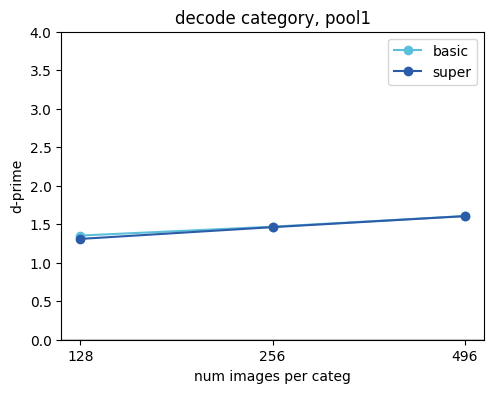

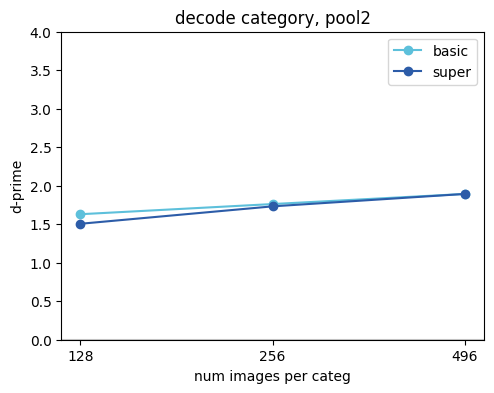

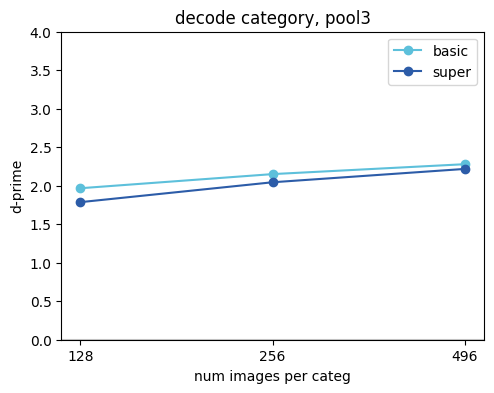

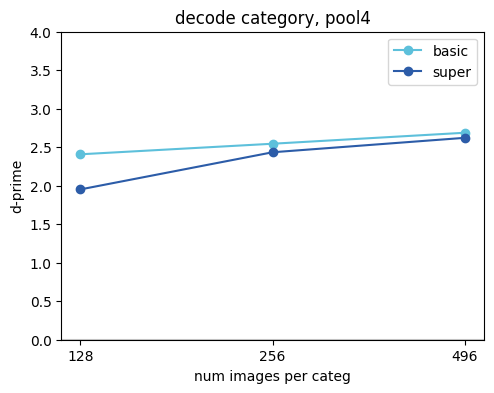

In [8]:
for li in range(4):

    vals = np.array([np.mean(basic_dprime[:,li,:], axis=0, keepdims=True), \
                     super_dprime[:,li,:]])

    plt.figure(figsize=(12,4))
    ax = plt.subplot(1,2,1)
    lh = []
    for cc in range(2):

        h = plt.plot(vals[cc,0,:], 'o-', color=level_colors[cc,:])

        plt.xticks(np.arange(n_v), n_ims_vals)

        lh += [h[0]]
        
#     for si in range(n_super):
 
#         plt.plot(basic_dprime[si,li,:], '-', color=level_colors[0,:])
        
    plt.legend(lh, level_names)

    plt.axhline(0, color=[0.8, 0.8, 0.8])

    plt.ylabel('d-prime')
    
    plt.ylim([0, 4])

    plt.title('decode category, %s'%layer_names[li])

    plt.xlabel('num images per categ')

#### plot results for individual categories

[1.60652926 1.60489758]
[1.89333356 1.89329611]
[2.2795288  2.21816744]
[2.68798055 2.62206021]


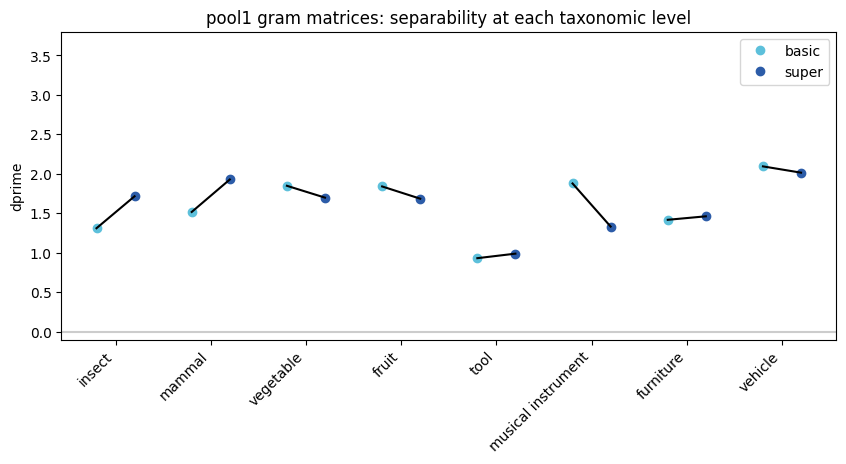

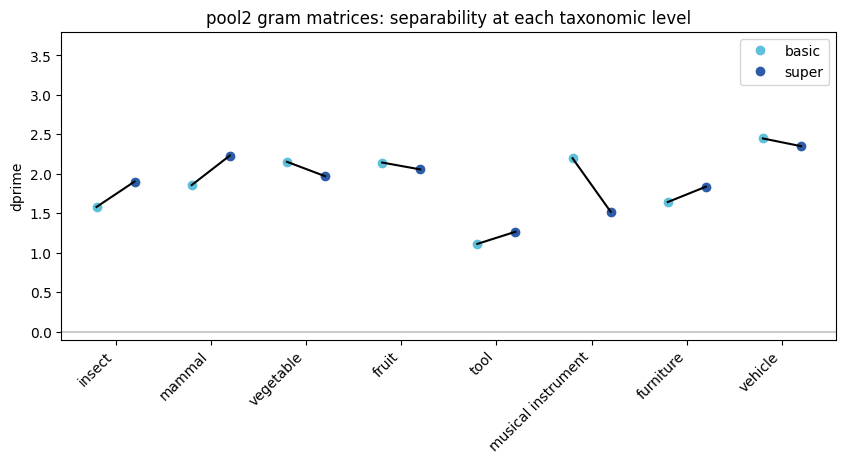

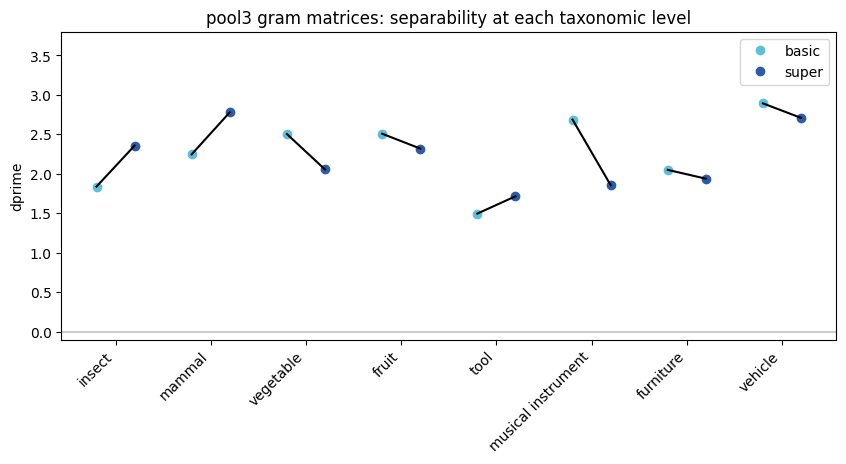

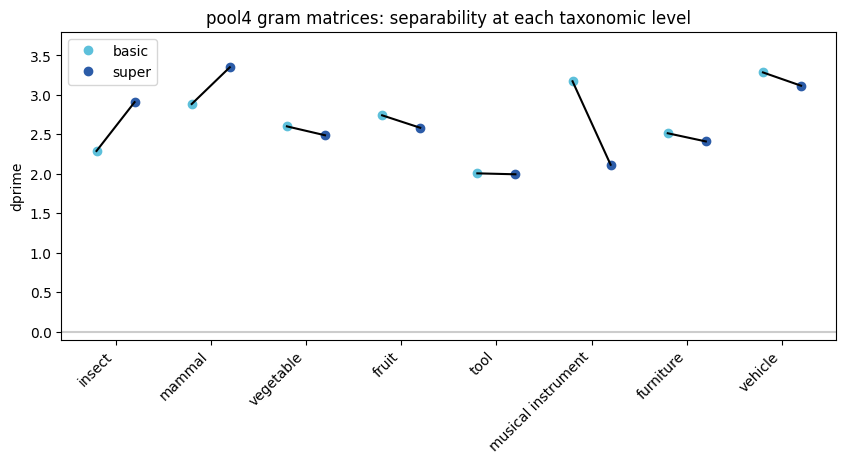

In [9]:
ni = 2;

xjitters = np.array([-0.2, 0.2])
   
for li in range(4):
    

    vals = np.array([basic_dprime[:,li,ni], super_dprime_each_supcat[:,li,ni]])

    
    plt.figure(figsize=(10,4))
    
    lh=[]
    for ca in range(n_super):
    
        for cc in range(2):
            h = plt.plot(ca+xjitters[cc], vals[cc,ca], \
                    'o', color=level_colors[cc,:])
            if ca==0:
                lh+=h
    
        plt.plot(ca+xjitters, vals[:,ca], color='k')
    
    plt.xticks(np.arange(n_super), super_names, rotation=45, ha='right')
    
    plt.axhline(0, color=[0.8, 0.8, 0.8])
    
    plt.title('%s gram matrices: separability at each taxonomic level'%layer_names[li])
    
    plt.legend(lh, level_names)
    print(np.mean(vals, axis=1))
    
    plt.ylabel('dprime')

    plt.ylim([-0.1, 3.8])